Các điểm dữ liệu nằm trong phạm vi truy vấn:
[[34 45]
 [42 23]]


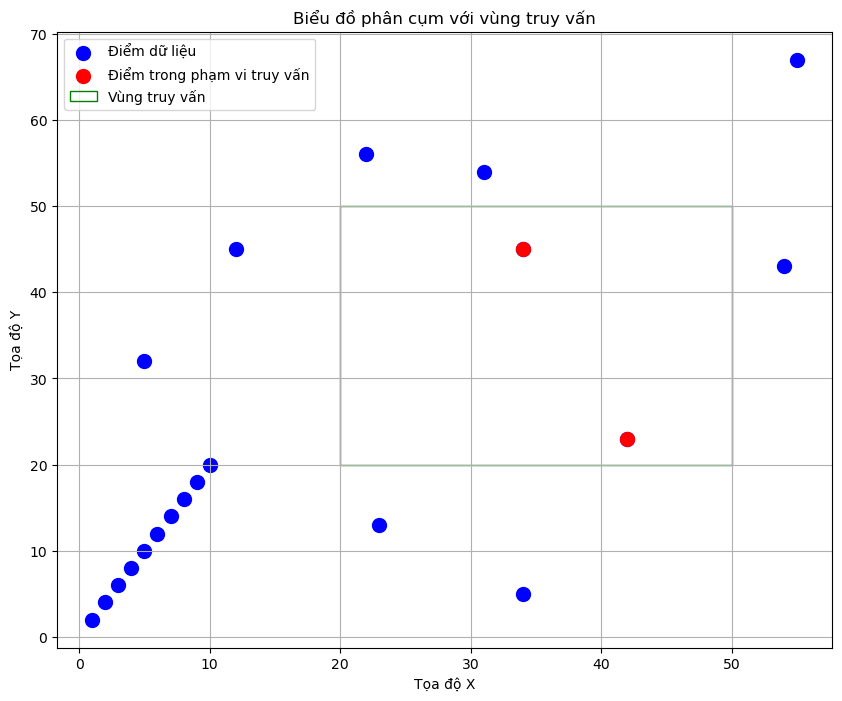

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class STING:
    def __init__(self, data, grid_size, levels):
        self.data = data
        self.grid_size = grid_size
        self.levels = levels
        self.grid = {}

    def build_grid(self):
        for point in self.data:
            grid_cell = tuple((point // self.grid_size).astype(int))
            if grid_cell not in self.grid:
                self.grid[grid_cell] = []
            self.grid[grid_cell].append(point)

    def query(self, query_range):
        x_min, y_min = query_range[0]
        x_max, y_max = query_range[1]
        
        results = []
        for grid_cell, points in self.grid.items():
            grid_x, grid_y = grid_cell
            cell_min_x = grid_x * self.grid_size
            cell_min_y = grid_y * self.grid_size
            cell_max_x = cell_min_x + self.grid_size
            cell_max_y = cell_min_y + self.grid_size
            
            if cell_min_x >= x_min and cell_max_x <= x_max and cell_min_y >= y_min and cell_max_y <= y_max:
                results.extend(points)
        
        return np.array(results)

file_path = 'toa_do_diem.xlsx'
df = pd.read_excel(file_path)

data = df[['Toạ độ x', 'Toạ độ y']].to_numpy()

grid_size = 10.0 
levels = 3  

sting = STING(data, grid_size=grid_size, levels=levels)
sting.build_grid()

x_min = 20
y_min = 20
x_max = 50
y_max = 50

query_range = [(x_min, y_min), (x_max, y_max)]

result = sting.query(query_range)

print("Các điểm dữ liệu nằm trong phạm vi truy vấn:")
print(result)

plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Điểm dữ liệu', s=100)
plt.scatter(result[:, 0], result[:, 1], color='red', label='Điểm trong phạm vi truy vấn', s=100)

plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                    linewidth=1, edgecolor='green', facecolor='none', label='Vùng truy vấn'))

plt.title('Biểu đồ phân cụm với vùng truy vấn')
plt.xlabel('Tọa độ X')
plt.ylabel('Tọa độ Y')
plt.legend()
plt.grid()
plt.show()
